## **Importing Necessary Libraries**

In [226]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [202]:
Dataset = pd.read_csv('kidney_disease.csv')
Dataset.head(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


## **Initial Analysis**

In [203]:
Dataset.shape

(400, 26)

In [204]:
Dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [205]:
Dataset.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [206]:
Dataset.describe(include = 'all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,NaN,NaN,NaN,NaN,NaN,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


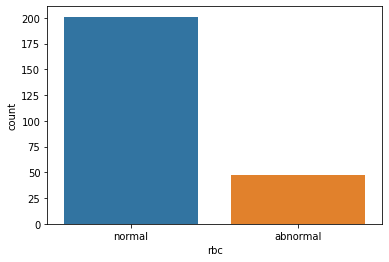

In [207]:
sns.countplot(Dataset['rbc'])
plt.show()

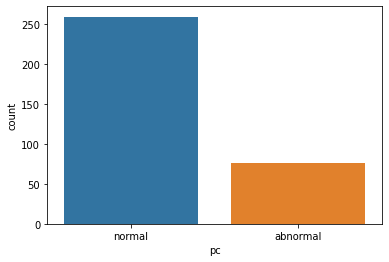

In [208]:
sns.countplot(Dataset['pc'])
plt.show()

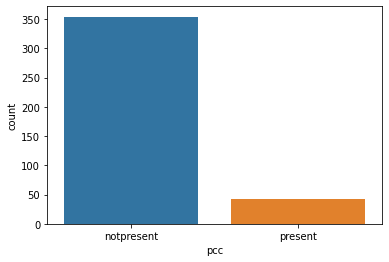

In [209]:
sns.countplot(Dataset['pcc'])
plt.show()

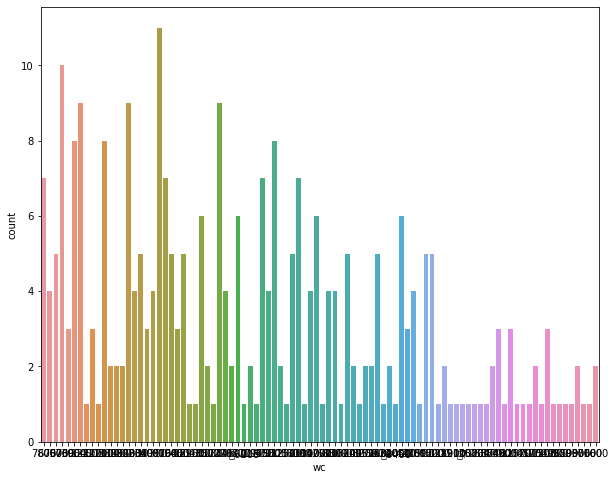

In [210]:
plt.figure(figsize =(10,8))
sns.countplot(Dataset['wc'])
plt.show()

## **Data Cleaning**

In [211]:
Dataset = Dataset.drop(labels =['pcv','wc','rc'],axis = 1)

In [212]:
Dataset['bp'] = Dataset['bp'].fillna(value=Dataset['bp'].mean(),axis = 0)
Dataset['sg'] = Dataset['sg'].fillna(value=Dataset['sg'].mean(),axis = 0)
Dataset['al'] = Dataset['al'].fillna(value=Dataset['al'].mean(),axis = 0)
Dataset['su'] = Dataset['su'].fillna(value=Dataset['su'].mean(),axis = 0)
Dataset['rbc'] = Dataset['rbc'].fillna(value='normal',axis = 0)
Dataset['pc'] = Dataset['pc'].fillna(value= 'normal',axis = 0)
Dataset['pcc'] = Dataset['pcc'].fillna(value='notpresent',axis = 0)
Dataset['bgr'] = Dataset['bgr'].fillna(value=Dataset['bgr'].mean(),axis = 0)
Dataset['sod'] = Dataset['sod'].fillna(value=Dataset['sod'].mean(),axis = 0)
Dataset['pot'] = Dataset['pot'].fillna(value=Dataset['pot'].mean(),axis = 0)
Dataset['hemo'] = Dataset['hemo'].fillna(value=Dataset['hemo'].mean(),axis = 0)

In [213]:
Dataset =pd.get_dummies(Dataset,columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], drop_first=True) 
Dataset

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,ckd,1,1,0,0,1,0,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,ckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,ckd,1,1,0,0,0,0,0,0,1,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,ckd,1,0,1,0,1,0,0,1,0,1,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,ckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,notckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,notckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,notckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,notckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0


In [214]:
Dataset.head(20)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.000000,1.020000,1.000000,0.000000,121.000000,36.0,1.2,137.528754,4.627244,15.4,ckd,1,1,0,0,1,0,0,0,1,1,0,0,0,0
1,1,7.0,50.000000,1.020000,4.000000,0.000000,148.036517,18.0,0.8,137.528754,4.627244,11.3,ckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
2,2,62.0,80.000000,1.010000,2.000000,3.000000,423.000000,53.0,1.8,137.528754,4.627244,9.6,ckd,1,1,0,0,0,0,0,0,1,1,0,1,0,1
3,3,48.0,70.000000,1.005000,4.000000,0.000000,117.000000,56.0,3.8,111.000000,2.500000,11.2,ckd,1,0,1,0,1,0,0,1,0,1,0,1,1,1
4,4,51.0,80.000000,1.010000,2.000000,0.000000,106.000000,26.0,1.4,137.528754,4.627244,11.6,ckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
5,5,60.0,90.000000,1.015000,3.000000,0.000000,74.000000,25.0,1.1,142.000000,3.200000,12.2,ckd,1,1,0,0,1,0,0,0,1,1,0,0,1,0
6,6,68.0,70.000000,1.010000,0.000000,0.000000,100.000000,54.0,24.0,104.000000,4.000000,12.4,ckd,1,1,0,0,0,0,0,1,0,1,0,0,0,0
7,7,24.0,76.469072,1.015000,2.000000,4.000000,410.000000,31.0,1.1,137.528754,4.627244,12.4,ckd,1,0,0,0,0,0,0,0,1,1,0,0,1,0
8,8,52.0,100.000000,1.015000,3.000000,0.000000,138.000000,60.0,1.9,137.528754,4.627244,10.8,ckd,1,0,1,0,1,0,0,0,1,1,0,0,0,1
9,9,53.0,90.000000,1.020000,2.000000,0.000000,70.000000,107.0,7.2,114.000000,3.700000,9.5,ckd,0,0,1,0,1,0,0,0,1,1,0,1,0,1


In [215]:
Dataset.isna().sum()

id                 0
age                9
bp                 0
sg                 0
al                 0
su                 0
bgr                0
bu                19
sc                17
sod                0
pot                0
hemo               0
classification     0
rbc_normal         0
pc_normal          0
pcc_present        0
ba_present         0
htn_yes            0
dm_\tyes           0
dm_ yes            0
dm_no              0
dm_yes             0
cad_no             0
cad_yes            0
appet_poor         0
pe_yes             0
ane_yes            0
dtype: int64

In [216]:
Dataset = Dataset.dropna( axis = 1)
Dataset.shape

(400, 24)

In [217]:
Dataset.isna().sum()

id                0
bp                0
sg                0
al                0
su                0
bgr               0
sod               0
pot               0
hemo              0
classification    0
rbc_normal        0
pc_normal         0
pcc_present       0
ba_present        0
htn_yes           0
dm_\tyes          0
dm_ yes           0
dm_no             0
dm_yes            0
cad_no            0
cad_yes           0
appet_poor        0
pe_yes            0
ane_yes           0
dtype: int64

## **Model Building**

In [218]:
x= Dataset.drop(labels = 'classification', axis = 1)
y = Dataset[['classification']]

In [219]:
le = LabelEncoder()
le_y = le.fit_transform(Dataset['classification'])
Y = pd.DataFrame(le_y,columns=['classification'])
Y

,classification
0,0
1,0
2,0
3,0
4,0
...,...
395,2
396,2
397,2
398,2


In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.20,random_state = 12)

In [237]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((320, 23), (320, 1), (80, 23), (80, 1))

## **Model Training**

In [239]:
RF_Model = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=4,random_state=12)
RF_Model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=12)

## **Model Testing**

In [242]:
y_train_pred = RF_Model.predict(x_train) # For Train Data
y_test_pred = RF_Model.predict(x_test) # For Test Data


##**Model Evaluation**

In [243]:
accuracy_score(y_train,y_train_pred) #For Train Data

1.0

In [244]:
accuracy_score(y_test,y_test_pred) #For Test Data

0.975